In [1]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetMNIST
import matplotlib.pyplot as plt

In [2]:
from Boosting import Ensemble, runBoosting
from AdversarialAttacks import attack_fgsm, attack_pgd

In [3]:
import utils

In [4]:
cuda = torch.device('cuda:0')

In [5]:
%load_ext autoreload
%autoreload 2

## MNIST Boosting (Adversarial)

In [6]:
# maxSamples_vals = [200, 1000, 4000, 10000, 50000, 100000]
maxSamples_vals = [10000, 50000, 100000]
# maxSamples_vals = [4000]

In [7]:
num_wl = 100 # maybe around 100? #later: maybe change this to an array?
num_epochs = 1

In [8]:
ensembles = []
epsilons = [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]

attack eps ens [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
----------------------------------------------------------------------------------------------------
Training weak learner 0
adv_train: True
Epoch: 0
Progress: 200,  val accuracy: 0.0800


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:88: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  img, target = self.data[index], int(self.targets[index])


Progress: 1200,  val accuracy: 0.4650
Progress: 2200,  val accuracy: 0.7000
Progress: 3200,  val accuracy: 0.8050
Progress: 4200,  val accuracy: 0.8800
Progress: 5200,  val accuracy: 0.8250
Progress: 6200,  val accuracy: 0.9300
Progress: 7200,  val accuracy: 0.9550
Progress: 8200,  val accuracy: 0.9300
Progress: 9200,  val accuracy: 0.9350
Progress: 10100,  val accuracy: 0.9600
Training accuracy of weak learner:  0.9219833333333334
Alpha:  1.5471547635973262
Progress: 0,  val accuracy: 0.9600
----------------------------------------------------------------------------------------------------
Training weak learner 1
adv_train: True
Epoch: 0
Progress: 200,  val accuracy: 0.1150
Progress: 1200,  val accuracy: 0.0500
Progress: 2200,  val accuracy: 0.1400
Progress: 3200,  val accuracy: 0.1750
Progress: 4200,  val accuracy: 0.3450
Progress: 5200,  val accuracy: 0.6400
Progress: 6200,  val accuracy: 0.7700
Progress: 7200,  val accuracy: 0.7500
Progress: 8200,  val accuracy: 0.8050
Progress: 9

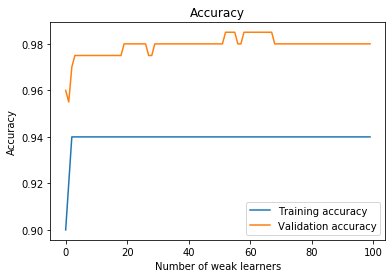

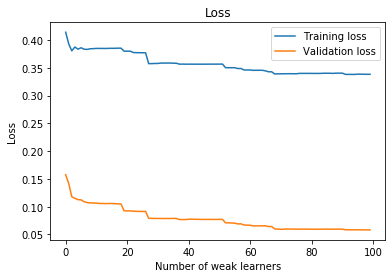

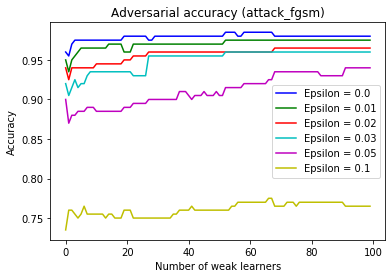

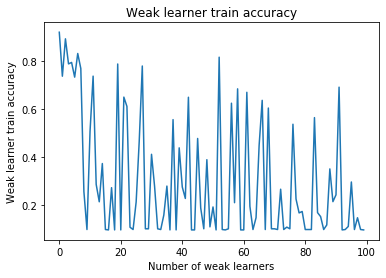

attack eps ens [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
----------------------------------------------------------------------------------------------------
Training weak learner 0
adv_train: True
Epoch: 0
Progress: 200,  val accuracy: 0.0800
Progress: 1200,  val accuracy: 0.3750
Progress: 2200,  val accuracy: 0.6150
Progress: 3200,  val accuracy: 0.7800
Progress: 4200,  val accuracy: 0.8050
Progress: 5200,  val accuracy: 0.8500
Progress: 6200,  val accuracy: 0.8650
Progress: 7200,  val accuracy: 0.8600
Progress: 8200,  val accuracy: 0.8950
Progress: 9200,  val accuracy: 0.9150
Progress: 10200,  val accuracy: 0.9050
Progress: 11200,  val accuracy: 0.9350
Progress: 12200,  val accuracy: 0.9600
Progress: 13200,  val accuracy: 0.9650
Progress: 14200,  val accuracy: 0.9600
Progress: 15200,  val accuracy: 0.9900
Progress: 16200,  val accuracy: 0.9750
Progress: 17200,  val accuracy: 0.9750
Progress: 18200,  val accuracy: 0.9700
Progress: 19200,  val accuracy: 0.9800
Progress: 20200,  val accuracy:

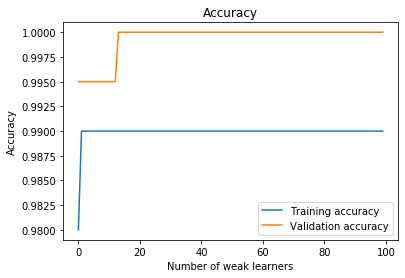

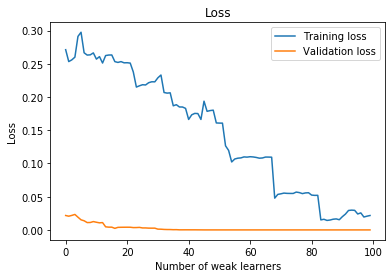

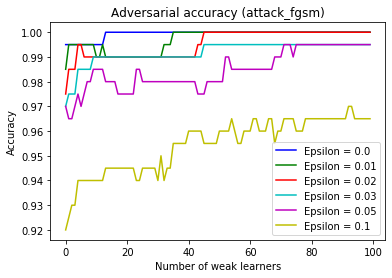

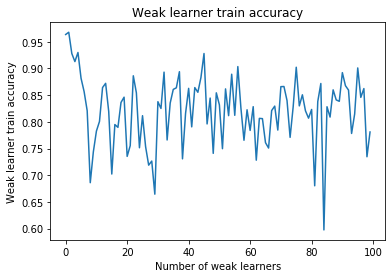

attack eps ens [0.0, 0.01, 0.02, 0.03, 0.05, 0.1]
----------------------------------------------------------------------------------------------------
Training weak learner 0
adv_train: True
Epoch: 0
Progress: 200,  val accuracy: 0.1200
Progress: 1200,  val accuracy: 0.2950
Progress: 2200,  val accuracy: 0.6850
Progress: 3200,  val accuracy: 0.8500
Progress: 4200,  val accuracy: 0.7800
Progress: 5200,  val accuracy: 0.8900
Progress: 6200,  val accuracy: 0.9250
Progress: 7200,  val accuracy: 0.9350
Progress: 8200,  val accuracy: 0.9350
Progress: 9200,  val accuracy: 0.9450
Progress: 10200,  val accuracy: 0.9550
Progress: 11200,  val accuracy: 0.9450
Progress: 12200,  val accuracy: 0.9650
Progress: 13200,  val accuracy: 0.9650
Progress: 14200,  val accuracy: 0.9750
Progress: 15200,  val accuracy: 0.9600
Progress: 16200,  val accuracy: 0.9800
Progress: 17200,  val accuracy: 0.9850
Progress: 18200,  val accuracy: 0.9850
Progress: 19200,  val accuracy: 0.9850
Progress: 20200,  val accuracy:

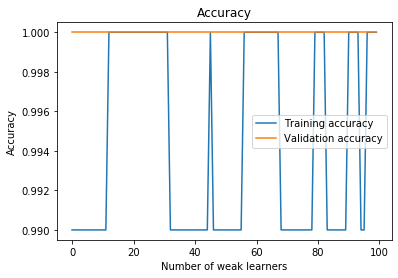

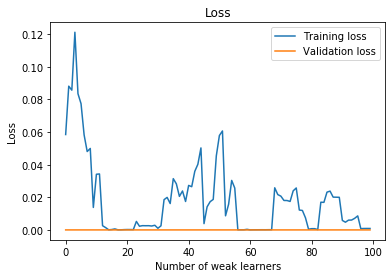

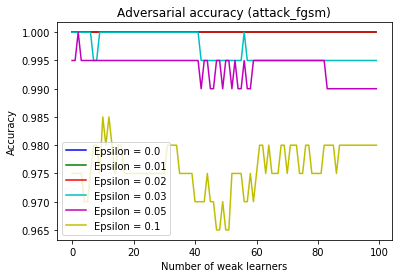

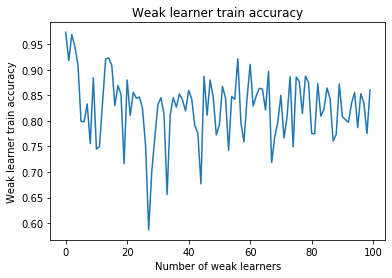

In [9]:
for i in range(len(maxSamples_vals)):
    maxSamples = maxSamples_vals[i]
    ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.MNIST, weakLearnerType = WongNeuralNetMNIST, val_attacks = [attack_fgsm], 
                               attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=0.1, adv_train=True)
    ensembles.append(ensemble)
    path_head = 'results/plots/mnist/'
    acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
    adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
    loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
    wl_train_acc_file = path_head + f'wl_train_acc_maxSamples_{maxSamples}.png'
    ensemble.plot_accuracies(acc_file)
    ensemble.plot_loss(loss_file)
    ensemble.plot_adversarial_accuracies(adv_acc_file)
    ensemble.plot_wl_train_acc(wl_train_acc_file)

In [ ]:
for maxSamples in maxSamples_vals:
        ensemble = runBoosting(num_wl, maxSamples, dataset=datasets.MNIST, weakLearnerType = WongNeuralNetMNIST, val_attacks = [attack_fgsm], 
                               attack_eps_nn=epsilons, attack_eps_ensemble=epsilons, train_eps_nn=0.1, adv_train=True)
        ensembles.append(ensemble)

In [ ]:
for i in range(len(maxSamples_vals)):
    maxSamples = maxSamples_vals[i]
    ensemble = ensembles[i]
    path_head = 'results/plots/mnist/'
    acc_file = path_head + f'acc_maxSamples_{maxSamples}.png'
    adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
    loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
    ensemble.plot_accuracies(acc_file)
    ensemble.plot_loss(loss_file)
    ensemble.plot_adversarial_accuracies(adv_acc_file)

In [10]:
ensembles[0].plot_adversarial_accuracies()

TypeError: plot_adversarial_accuracies() missing 1 required positional argument: 'path'

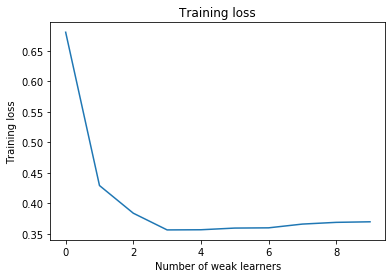

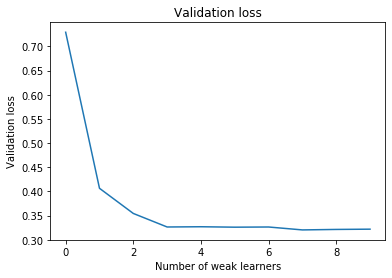

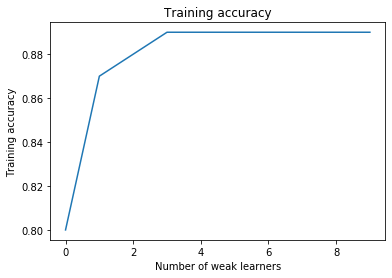

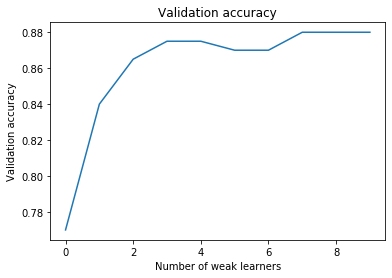

In [11]:
ensembles[0].plot_train_loss()
ensembles[0].plot_val_loss()
ensembles[0].plot_train_accuracies()
ensembles[0].plot_val_accuracies()

In [10]:
ensembles[0].attack_eps

[]